In [2]:
import setup
import pandas as pd
from src.load_data import load_train
from src.transform_data import  (
    fillna_age, 
    add_age_group,
    build_preprocessor,
    split
)
from src.features import (
    add_family_size,
    add_is_child,
    add_male_child,
    add_rich_male
)

In [3]:
train = load_train()
train = fillna_age(train)
train = add_age_group(train)
train = add_family_size(train)
train = add_is_child(train)
train = add_male_child(train)
train = add_rich_male(train)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_group    891 non-null    category
 13  Family_size  891 non-null    int64   
 14  Is_Child     891 non-null    int64   
 15  Male_Child   891 non-null    int64   
 16  rich_male    891 non-null    int64   
dtypes: category(1), float64(2), int64(9), object(5)
memory usage: 112.7+ KB


In [28]:
num_features = ['Pclass', 'Age', 'Family_size', 'Is_Child']
cat_features = ['Sex', 'Age_group']

In [29]:
X_train, X_val, y_train, y_val = split(train, num_features, cat_features)

preprocessor = build_preprocessor(num_features, cat_features)

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed   = preprocessor.transform(X_val)


In [30]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_processed, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [31]:
from sklearn.metrics import accuracy_score

y_pred = log_clf.predict(X_val_processed)
accuracy_score(y_val, y_pred)

0.8324022346368715

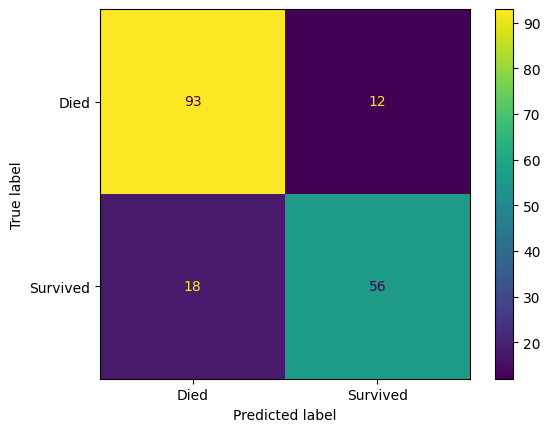

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred)

ConfusionMatrixDisplay(cm, display_labels=["Died", "Survived"]).plot()

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [34]:
y_probs = log_clf.predict_proba(X_val_processed)[:, 1]

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_val, y_probs)
auc


0.8679536679536679

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_val, y_probs)
auc = roc_auc_score(y_val, y_probs)


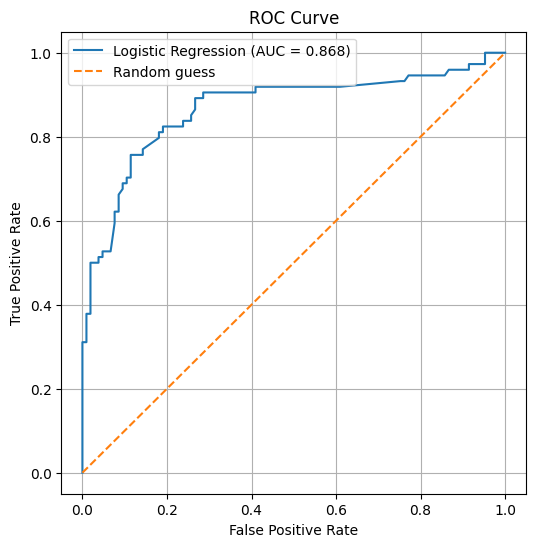

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
y_pred = (y_probs > 0.5).astype(int)
cm = confusion_matrix(y_val, y_pred)
cm

array([[93, 12],
       [18, 56]])

In [38]:
val = X_val.copy()
val["y_true"] = y_val.values
val["y_prob"] = y_probs
val["y_pred"] = y_pred


In [39]:
val[(val.y_true == 1) & (val.y_pred == 0)].head(20)

,Pclass,Age,Family_size,Is_Child,Sex,Age_group,y_true,y_prob,y_pred
709,3,25.0,3,0,male,20-30,1,0.060054,0
621,1,42.0,2,0,male,40-50,1,0.348915,0
673,2,31.0,1,0,male,30-40,1,0.305417,0
204,3,18.0,1,0,male,10-20,1,0.108006,0
23,1,28.0,1,0,male,20-30,1,0.463046,0
802,1,11.0,4,0,male,10-20,1,0.314565,0
889,1,26.0,1,0,male,20-30,1,0.481482,0
165,3,9.0,3,1,male,0-10,1,0.303304,0
712,1,48.0,2,0,male,40-50,1,0.300323,0
338,3,45.0,1,0,male,40-50,1,0.078402,0


In [40]:
val[(val.y_true == 0) & (val.y_pred == 1)].head(20)

,Pclass,Age,Family_size,Is_Child,Sex,Age_group,y_true,y_prob,y_pred
396,3,31.0,1,0,female,30-40,0,0.705595,1
235,3,21.5,1,0,female,20-30,0,0.681210,1
772,2,57.0,1,0,female,50-60,0,0.746340,1
312,2,26.0,3,0,female,20-30,0,0.724244,1
767,3,30.5,1,0,female,30-40,0,0.709422,1
357,2,38.0,1,0,female,30-40,0,0.838063,1
541,3,9.0,7,1,female,0-10,0,0.641260,1
578,3,21.5,2,0,female,20-30,0,0.606193,1
49,3,18.0,2,0,female,10-20,0,0.570816,1
854,2,44.0,2,0,female,40-50,0,0.730650,1


In [41]:
len(val[(val.y_true == 1) & (val.Age < 20)]) / len(val[val.Age < 20])

0.6176470588235294